In [ ]:
import os

def get_folder_sizes(base_path):
    folder_sizes = []

    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            total_size = 0
            for dirpath, _, filenames in os.walk(folder_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    if os.path.exists(fp):
                        total_size += os.path.getsize(fp)
            folder_sizes.append((folder, total_size))

    return sorted(folder_sizes, key=lambda x: x[1], reverse=True)

# === Replace with your Downloads path if needed
downloads_path = os.path.expanduser(r"C:\Users\KEN\Downloads")
sizes = get_folder_sizes(downloads_path)

print(f"\n📁 Folder sizes in {downloads_path}:\n")
for folder, size in sizes:
    size_mb = size / (1024 * 1024)
    print(f"{folder:<30} {size_mb:>10.2f} MB")



📁 Folder sizes in C:\Users\KEN\Downloads:

Tensorflow                        8973.72 MB
audio_dataset-001                 3320.21 MB
drive-download-20250310T110749Z-002    1809.43 MB
CPE 313-CPE32S8 - Advanced Machine Learning and Deep Learning    1128.36 MB
CPEYETSA EVENT PHOTOS (1920 x 1080 px)     924.08 MB
New folder                         737.13 MB
wetransfer_upload_2024-12-15_1300     709.91 MB
DATA SCI 3 SUBMISSIONS             387.29 MB
biased-orange-scone (2)            376.92 MB
drive-download-20241111T060750Z-001     356.32 MB
dogcat                             305.18 MB
Y20A_C2_UWL_PP-inst-E1             262.36 MB
CPE CHALLENGES                     154.82 MB
DSP                                123.71 MB
mnist_train.csv                    104.56 MB
POSTINGS ICPEP                      64.44 MB
CPE CHALLENGE WINNERS ANNOUNCEMENT      38.47 MB
ML                                  36.35 MB
Books                               31.37 MB
widsdatathon2022                    29.32 MB


In [ ]:
import os

def get_folder_sizes(base_path):
    folder_sizes = []

    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            total_size = 0
            for dirpath, _, filenames in os.walk(folder_path):
                for f in filenames:
                    fp = os.path.join(dirpath, f)
                    if os.path.exists(fp):
                        total_size += os.path.getsize(fp)
            folder_sizes.append((folder, total_size))

    return sorted(folder_sizes, key=lambda x: x[1], reverse=True)

# === Replace with your Downloads path if needed
downloads_path = os.path.expanduser(r"C:\Users\KEN\Desktop")
sizes = get_folder_sizes(downloads_path)

print(f"\n📁 Folder sizes in {downloads_path}:\n")
for folder, size in sizes:
    size_mb = size / (1024 * 1024)
    print(f"{folder:<30} {size_mb:>10.2f} MB")



📁 Folder sizes in C:\Users\KEN\Desktop:

DSI                               7428.36 MB
Distributed Training              4969.18 MB
Adobe Illustrator 2023 27.2.0.339 (x64) [TheWindowsForum.com]    4731.96 MB
project-root                      2370.06 MB
ReactNative                       2332.66 MB
EXPLORATORY DATA ANALYSIS         1909.87 MB
FIN                               1837.99 MB
New folder                        1790.55 MB
EXAMPLE                            876.99 MB
Adobe Photoshop CS6 Portable       743.32 MB
DATABASE CONTENT                   700.69 MB
REFACTORED                         595.51 MB
COMPLETE FRONTEND                  438.19 MB
FINAL PROJ                         346.76 MB
KP                                 305.55 MB
MyAnimationApp                     275.47 MB
BASIC                              262.34 MB
NewApp                             257.06 MB
SOFTWARE DESIGN                    191.72 MB
backend                             40.59 MB
Data Sci 3                 

In [ ]:
import os

BASE_DIR = "audio_dataset-001/20k_audio_splitted_dataset"

splits = ["train", "val", "test"]
classes = ["Queen", "Queenless"]

total_count = 0

for split in splits:
    for label in classes:
        folder = os.path.join(BASE_DIR, split, label)
        if os.path.exists(folder):
            wav_files = [f for f in os.listdir(folder) if f.endswith(".wav")]
            count = len(wav_files)
            total_count += count
            print(f"{split.capitalize():<5} / {label:<10}: {count:>5} files")
        else:
            print(f"❌ Missing folder: {folder}")

print(f"\n🧮 Total .wav files: {total_count}")


Train / Queen     :  7000 files
Train / Queenless :  7000 files
Val   / Queen     :  1000 files
Val   / Queenless :  1000 files
Test  / Queen     :  2000 files
Test  / Queenless :  2000 files

🧮 Total .wav files: 20000


In [ ]:
from pydub import AudioSegment
from pydub.generators import Sine
import os
import csv

# === Configuration ===
BASE_DIR = "audio_dataset-001/20k_audio_splitted_dataset"
OUTPUT_DIR = "full_dataset_parts"
SEGMENT_LOG_DIR = "segment_logs_parts"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(SEGMENT_LOG_DIR, exist_ok=True)

CLIP_DURATION_MS = 2000
MARKER_DURATION_MS = 500
MARKER_FREQ_HZ = 1000
marker = Sine(MARKER_FREQ_HZ).to_audio_segment(duration=MARKER_DURATION_MS).apply_gain(-6)

# === Segment Map (linear order, total 20000)
dataset_structure = [
    ("train", "Queen", 7000),
    ("val", "Queen", 1000),
    ("test", "Queen", 2000),
    ("train", "Queenless", 7000),
    ("val", "Queenless", 1000),
    ("test", "Queenless", 2000),
]

# === Collect all clips with absolute segment_id ===
all_clips = []
segment_id = 0

for split, label, count in dataset_structure:
    folder = os.path.join(BASE_DIR, split, label)
    files = sorted(f for f in os.listdir(folder) if f.endswith(".wav"))
    assert len(files) == count, f"Expected {count} files in {split}/{label}, found {len(files)}"

    for fname in files:
        all_clips.append((segment_id, split, label, fname, os.path.join(folder, fname)))
        segment_id += 1

assert len(all_clips) == 20000, "Expected 20000 clips total"

# === Slice into 20 parts of 1000 clips each
PART_SIZE = 1000
for part_idx in range(20):
    part_clips = all_clips[part_idx * PART_SIZE : (part_idx + 1) * PART_SIZE]
    part_audio = AudioSegment.silent(duration=0)
    part_log = []

    for seg_id, split, label, fname, path in part_clips:
        clip = AudioSegment.from_wav(path)

        if len(clip) < CLIP_DURATION_MS:
            clip += AudioSegment.silent(duration=CLIP_DURATION_MS - len(clip))
        elif len(clip) > CLIP_DURATION_MS:
            clip = clip[:CLIP_DURATION_MS]

        part_audio += clip + marker
        part_log.append([f"{seg_id:05d}", split, label, fname])

    # Export .wav
    out_name = f"part_{part_idx+1:02d}.wav"
    out_path = os.path.join(OUTPUT_DIR, out_name)
    part_audio.export(out_path, format="wav")
    print(f"✅ Exported {out_name} with {len(part_clips)} segments")

    # Export CSV
    log_name = f"part_{part_idx+1:02d}_map.csv"
    with open(os.path.join(SEGMENT_LOG_DIR, log_name), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["segment_id", "split", "label", "filename"])
        writer.writerows(part_log)

print("\n🎉 All 20 parts successfully exported.")


C:\Users\KEN\AppData\Roaming\Python\Python39\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


✅ Exported part_01.wav with 1000 segments
✅ Exported part_02.wav with 1000 segments
✅ Exported part_03.wav with 1000 segments
✅ Exported part_04.wav with 1000 segments
✅ Exported part_05.wav with 1000 segments
✅ Exported part_06.wav with 1000 segments
✅ Exported part_07.wav with 1000 segments
✅ Exported part_08.wav with 1000 segments
✅ Exported part_09.wav with 1000 segments
✅ Exported part_10.wav with 1000 segments
✅ Exported part_11.wav with 1000 segments
✅ Exported part_12.wav with 1000 segments
✅ Exported part_13.wav with 1000 segments
✅ Exported part_14.wav with 1000 segments
✅ Exported part_15.wav with 1000 segments
✅ Exported part_16.wav with 1000 segments
✅ Exported part_17.wav with 1000 segments
✅ Exported part_18.wav with 1000 segments
✅ Exported part_19.wav with 1000 segments
✅ Exported part_20.wav with 1000 segments

🎉 All 20 parts successfully exported.


In [ ]:
from pydub import AudioSegment
import os
import csv

# === Configuration ===
PART_WAV_DIR = "full_dataset_parts"
CSV_DIR = "segment_logs_parts"
OUTPUT_DIR = "final_dataset_splits"
os.makedirs(OUTPUT_DIR, exist_ok=True)

CLIP_DURATION_MS = 2000
GAP_DURATION_MS = 500
TOTAL_DURATION_MS = CLIP_DURATION_MS + GAP_DURATION_MS

# === Final buckets: each list stores 2s clips
final_sets = {
    ("train", "Queen"): [],
    ("val", "Queen"): [],
    ("test", "Queen"): [],
    ("train", "Queenless"): [],
    ("val", "Queenless"): [],
    ("test", "Queenless"): [],
}

# === Process each part
for i in range(1, 21):
    part_file = f"part_{i:02d}.wav"
    map_file = f"part_{i:02d}_map.csv"

    part_path = os.path.join(PART_WAV_DIR, part_file)
    map_path = os.path.join(CSV_DIR, map_file)

    print(f"🔍 Processing {part_file}...")

    audio = AudioSegment.from_wav(part_path)

    # Read CSV
    with open(map_path, "r") as f:
        reader = csv.DictReader(f)
        entries = list(reader)

    for j, row in enumerate(entries):
        segment_start = j * TOTAL_DURATION_MS
        segment_end = segment_start + TOTAL_DURATION_MS  # 👈 include marker
        clip = audio[segment_start:segment_end]  # Full 2.5s segment

        key = (row["split"], row["label"])
        if key in final_sets:
            final_sets[key].append(clip)
        else:
            print(f"⚠️ Unknown key: {key}")


# === Export the 6 final combined files
for (split, label), clips in final_sets.items():
    print(f"🎛️ Merging {len(clips)} clips for {split}_{label}...")
    merged = sum(clips, AudioSegment.silent(duration=0))
    out_path = os.path.join(OUTPUT_DIR, f"{split}_{label}.wav")
    merged.export(out_path, format="wav")
    print(f"✅ Exported: {out_path}")

print("\n🎉 All 6 master `.wav` files created successfully.")


🔍 Processing part_01.wav...
🔍 Processing part_02.wav...
🔍 Processing part_03.wav...
🔍 Processing part_04.wav...
🔍 Processing part_05.wav...
🔍 Processing part_06.wav...
🔍 Processing part_07.wav...
🔍 Processing part_08.wav...
🔍 Processing part_09.wav...
🔍 Processing part_10.wav...
🔍 Processing part_11.wav...
🔍 Processing part_12.wav...
🔍 Processing part_13.wav...
🔍 Processing part_14.wav...
🔍 Processing part_15.wav...
🔍 Processing part_16.wav...
🔍 Processing part_17.wav...
🔍 Processing part_18.wav...
🔍 Processing part_19.wav...
🔍 Processing part_20.wav...
🎛️ Merging 7000 clips for train_Queen...


KeyboardInterrupt: 

In [ ]:
from pydub import AudioSegment
import os

WAV_DIR = "full_dataset_parts"  # Change to your folder

total_duration_ms = 0

for filename in sorted(os.listdir(WAV_DIR)):
    if filename.endswith(".wav"):
        path = os.path.join(WAV_DIR, filename)
        audio = AudioSegment.from_wav(path)
        total_duration_ms += len(audio)

total_minutes = total_duration_ms / 1000 / 60
print(f"🎧 Total duration: {total_minutes:.2f} minutes ({total_duration_ms / 1000:.2f} seconds)")


🎧 Total duration: 833.32 minutes (49999.10 seconds)


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import numpy as np

# === Config ===
BASE_DIR = r"D:\QBEE\audio_dataset-001\20k_audio_splitted_dataset\test"
CLASSES = ["Queen", "Queenless"]
OUTPUT_DIR = "mel_clean_test_samples"
SAMPLE_RATE = 22050

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Generate Mels
for label in CLASSES:
    folder = os.path.join(BASE_DIR, label)
    files = sorted([f for f in os.listdir(folder) if f.endswith(".wav")])[:20]

    print(f"🔍 Generating mels for {label} ({len(files)} samples)...")

    for i, fname in enumerate(files):
        file_path = os.path.join(folder, fname)

        # Load audio
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        # Generate Mel Spectrogram
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        mel_db = librosa.power_to_db(mel, ref=np.max)

        # Plot
        plt.figure(figsize=(4, 3))
        librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
        plt.title(f"{label} - {i}")
        plt.tight_layout()

        out_img = os.path.join(OUTPUT_DIR, f"{label.lower()}_mel_{i:02d}.png")
        plt.savefig(out_img)
        plt.close()

        print(f"✅ Saved: {out_img}")


🔍 Generating mels for Queen (20 samples)...
✅ Saved: mel_clean_test_samples\queen_mel_00.png
✅ Saved: mel_clean_test_samples\queen_mel_01.png
✅ Saved: mel_clean_test_samples\queen_mel_02.png
✅ Saved: mel_clean_test_samples\queen_mel_03.png
✅ Saved: mel_clean_test_samples\queen_mel_04.png
✅ Saved: mel_clean_test_samples\queen_mel_05.png
✅ Saved: mel_clean_test_samples\queen_mel_06.png
✅ Saved: mel_clean_test_samples\queen_mel_07.png
✅ Saved: mel_clean_test_samples\queen_mel_08.png
✅ Saved: mel_clean_test_samples\queen_mel_09.png
✅ Saved: mel_clean_test_samples\queen_mel_10.png
✅ Saved: mel_clean_test_samples\queen_mel_11.png
✅ Saved: mel_clean_test_samples\queen_mel_12.png
✅ Saved: mel_clean_test_samples\queen_mel_13.png
✅ Saved: mel_clean_test_samples\queen_mel_14.png
✅ Saved: mel_clean_test_samples\queen_mel_15.png
✅ Saved: mel_clean_test_samples\queen_mel_16.png
✅ Saved: mel_clean_test_samples\queen_mel_17.png
✅ Saved: mel_clean_test_samples\queen_mel_18.png
✅ Saved: mel_clean_test_s

In [ ]:
import pandas as pd
import os

segment_dir = "segment_logs_parts"
all_csvs = sorted([f for f in os.listdir(segment_dir) if f.endswith(".csv")])
full_df = pd.concat([pd.read_csv(os.path.join(segment_dir, f)) for f in all_csvs], ignore_index=True)
full_df.to_csv("segment_map_master.csv", index=False)
print("✅ Combined 20 CSVs into segment_map_master.csv")


✅ Combined 20 CSVs into segment_map_master.csv


In [ ]:
from pydub import AudioSegment
import os
import pandas as pd

# === CONFIG ===
INPUT_WAV = "recorded_14hr_session.wav"
START_OFFSET_MS = 6000                       # Skip first 6.054s
SEGMENT_DURATION_MS = 2000                  # Each clip = 2.0s
GAP_DURATION_MS = 500                       # Between each = marker
TOTAL_PER_SEGMENT = SEGMENT_DURATION_MS + GAP_DURATION_MS
MAX_ALLOWED_DURATION_MS = 50150 * 1000      # 13h 55m 50s in ms
OUTPUT_DIR = "dataset_mimic"

# === Load map
df = pd.read_csv("segment_map_master.csv")
print(f"🧾 Segments to extract: {len(df)}")

# === Prepare folders
for split in df["split"].unique():
    for label in df["label"].unique():
        os.makedirs(os.path.join(OUTPUT_DIR, split, label), exist_ok=True)

# === Load full audio
audio = AudioSegment.from_wav(INPUT_WAV)

# === Extract clips
for i, row in df.iterrows():
    start = START_OFFSET_MS + i * TOTAL_PER_SEGMENT
    end = start + SEGMENT_DURATION_MS

    # Skip if segment goes beyond the cutoff
    if end > MAX_ALLOWED_DURATION_MS:
        print(f"⏭️ Skipping segment {i}: past max duration")
        continue

    clip = audio[start:end]
    out_path = os.path.join(OUTPUT_DIR, row["split"], row["label"], row["filename"])
    clip.export(out_path, format="wav")

    if i % 1000 == 0:
        print(f"✅ {i}/{len(df)} segments done")

print("\n🎉 Dataset recreated in:", OUTPUT_DIR)


🧾 Segments to extract: 20000
✅ 0/20000 segments done
✅ 1000/20000 segments done
✅ 2000/20000 segments done
✅ 3000/20000 segments done
✅ 4000/20000 segments done
✅ 5000/20000 segments done
✅ 6000/20000 segments done
✅ 7000/20000 segments done
✅ 8000/20000 segments done
✅ 9000/20000 segments done
✅ 10000/20000 segments done
✅ 11000/20000 segments done
✅ 12000/20000 segments done
✅ 13000/20000 segments done
✅ 14000/20000 segments done
✅ 15000/20000 segments done
✅ 16000/20000 segments done
✅ 17000/20000 segments done
✅ 18000/20000 segments done
✅ 19000/20000 segments done

🎉 Dataset recreated in: dataset_mimic


In [ ]:
from pydub import AudioSegment

# === Paths to your audio files
files = {
    "QUEEN.wav": "QUEEN.wav",
    "QUEENLESS.wav": "QUEENLESS.wav",
    "recorded_14hr_session.wav": "recorded_14hr_session.wav"
}

# === Function to format ms to HH:MM:SS
def format_duration(ms):
    seconds = ms // 1000
    minutes = seconds // 60
    hours = minutes // 60
    return f"{hours}h {minutes % 60}m {seconds % 60}s"

# === Analyze durations
for name, path in files.items():
    try:
        audio = AudioSegment.from_wav(path)
        print(f"📁 {name}:")
        print(f"   - Duration: {format_duration(len(audio))}")
        print(f"   - Total ms: {len(audio):,}\n")
    except Exception as e:
        print(f"❌ Could not load {name}: {e}")


📁 QUEEN.wav:
   - Duration: 6h 56m 44s
   - Total ms: 25,004,046

📁 QUEENLESS.wav:
   - Duration: 6h 56m 44s
   - Total ms: 25,004,046

📁 recorded_14hr_session.wav:
   - Duration: 12h 25m 39s
   - Total ms: 44,739,243



In [ ]:
from pydub import AudioSegment
import os
import math

# === CONFIG ===
INPUT_WAV = "recorded_14hr_session.wav"
OUTPUT_BASE = "output"  # Directory to save

# === TIME WINDOWS (hh:mm:ss or float seconds)
SECTIONS = [
    ("train", "Queen",      7.5,        17504),   # 04h 51m 44s
    ("val", "Queen",        17505,        20005),   # 05h 33m 25s
    ("test", "Queen",       20006,        25006),   # 06h 56m 46s
    ("train", "Queenless",  25149,        42647),   # 11h 50m 47s
    ("val", "Queenless",    42648,        45148),   # 12h 32m 28s
    ("test", "Queenless",   45149,        50148),   # 13h 55m 48s
]

CHUNK_DURATION_MS = 2000

# === Load full audio
print("🔊 Loading audio...")
full_audio = AudioSegment.from_wav(INPUT_WAV)

# === Process each section
for split, label, start_s, end_s in SECTIONS:
    print(f"\n📁 Processing {split}/{label} [{start_s}s → {end_s}s]")

    # Create folder
    out_dir = os.path.join(OUTPUT_BASE, split, label)
    os.makedirs(out_dir, exist_ok=True)

    start_ms = int(start_s * 1000)
    end_ms = int(end_s * 1000)
    segment = full_audio[start_ms:end_ms]

    total_chunks = math.floor(len(segment) / CHUNK_DURATION_MS)

    for i in range(total_chunks):
        chunk = segment[i*CHUNK_DURATION_MS : (i+1)*CHUNK_DURATION_MS]
        filename = f"{label.lower()}_{i:04d}.wav"
        out_path = os.path.join(out_dir, filename)
        chunk.export(out_path, format="wav")

        if i % 1000 == 0:
            print(f"✅ {i}/{total_chunks} chunks saved...")

print("\n🎉 All sections segmented into 2s files.")


🔊 Loading audio...

📁 Processing train/Queen [7.5s → 17504s]
✅ 0/8748 chunks saved...
✅ 1000/8748 chunks saved...
✅ 2000/8748 chunks saved...
✅ 3000/8748 chunks saved...
✅ 4000/8748 chunks saved...
✅ 5000/8748 chunks saved...
✅ 6000/8748 chunks saved...
✅ 7000/8748 chunks saved...
✅ 8000/8748 chunks saved...

📁 Processing val/Queen [17505s → 20005s]
✅ 0/1250 chunks saved...
✅ 1000/1250 chunks saved...

📁 Processing test/Queen [20006s → 25006s]
✅ 0/2500 chunks saved...
✅ 1000/2500 chunks saved...
✅ 2000/2500 chunks saved...

📁 Processing train/Queenless [25149s → 42647s]
✅ 0/8749 chunks saved...
✅ 1000/8749 chunks saved...
✅ 2000/8749 chunks saved...
✅ 3000/8749 chunks saved...
✅ 4000/8749 chunks saved...
✅ 5000/8749 chunks saved...
✅ 6000/8749 chunks saved...
✅ 7000/8749 chunks saved...
✅ 8000/8749 chunks saved...

📁 Processing val/Queenless [42648s → 45148s]
✅ 0/1045 chunks saved...
✅ 1000/1045 chunks saved...

📁 Processing test/Queenless [45149s → 50148s]

🎉 All sections segmented in

In [ ]:
from pydub import AudioSegment
import os
import math

# === CONFIG ===
INPUT_WAV = "recorded_14hr_session.wav"
OUTPUT_DIR = "output/test/Queenless"
START_S = 45149       # 12h 32m 29s
END_S = 50148         # 13h 55m 48s
CHUNK_MS = 2000

# === Prep Output
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load audio
print("🔊 Loading audio segment for test/Queenless...")
full_audio = AudioSegment.from_wav(INPUT_WAV)
segment = full_audio[int(START_S * 1000): int(END_S * 1000)]

# === Segment and Export
print("✂️ Segmenting into 2s clips...")
total_chunks = math.floor(len(segment) / CHUNK_MS)

for i in range(total_chunks):
    chunk = segment[i * CHUNK_MS : (i + 1) * CHUNK_MS]
    out_path = os.path.join(OUTPUT_DIR, f"queenless_{i:04d}.wav")
    chunk.export(out_path, format="wav")

    if i % 500 == 0:
        print(f"✅ {i}/{total_chunks} saved...")

print(f"\n🎉 Done! {total_chunks} queenless test segments saved to {OUTPUT_DIR}")


🔊 Loading audio segment for test/Queenless...
✂️ Segmenting into 2s clips...

🎉 Done! 0 queenless test segments saved to output/test/Queenless


In [ ]:
from pydub import AudioSegment
import os
import math

# === CONFIG ===
INPUT_WAV = "last.wav"
OUTPUT_DIR = "output/test/Queenless"
CHUNK_MS = 2000

# === Prep output folder
os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Load audio
print("🔊 Loading last.wav...")
audio = AudioSegment.from_wav(INPUT_WAV)

# === Segment and Export
total_chunks = math.floor(len(audio) / CHUNK_MS)
print(f"✂️ Segmenting into {total_chunks} chunks...")

for i in range(total_chunks):
    chunk = audio[i * CHUNK_MS : (i + 1) * CHUNK_MS]
    out_path = os.path.join(OUTPUT_DIR, f"queenless_{i:04d}.wav")
    chunk.export(out_path, format="wav")

    if i % 500 == 0:
        print(f"✅ {i}/{total_chunks} saved...")

print(f"\n🎉 Finished! Segmented queenless test set saved to {OUTPUT_DIR}")


🔊 Loading last.wav...
✂️ Segmenting into 2499 chunks...
✅ 0/2499 saved...
✅ 500/2499 saved...
✅ 1000/2499 saved...
✅ 1500/2499 saved...
✅ 2000/2499 saved...

🎉 Finished! Segmented queenless test set saved to output/test/Queenless


In [ ]:
from pydub import AudioSegment
from pydub.effects import low_pass_filter
import os

# === CONFIG ===
INPUT_BASE = "output"                     # Your existing segmented clips
OUTPUT_BASE = "output_cleaned_aggressive" # New cleaned directory
REPEAT_FILTER = 12                         # How many times to apply low-pass
LOW_PASS_CUTOFF = 950                    # Cut everything above 1000 Hz

# === Ensure output folders exist
def ensure_dirs(path):
    if not os.path.exists(path):
        os.makedirs(path)

# === Apply aggressive EQ (simulates GUI EQ slider + 5 passes)
def aggressively_suppress(audio):
    for _ in range(REPEAT_FILTER):
        audio = low_pass_filter(audio, LOW_PASS_CUTOFF)
    return audio

# === Traverse and process
print("🔧 Aggressively cleaning .wav files...\n")

for root, _, files in os.walk(INPUT_BASE):
    for file in files:
        if not file.endswith(".wav"):
            continue

        input_path = os.path.join(root, file)
        rel_path = os.path.relpath(root, INPUT_BASE)
        output_dir = os.path.join(OUTPUT_BASE, rel_path)
        ensure_dirs(output_dir)

        try:
            audio = AudioSegment.from_wav(input_path)
            cleaned = aggressively_suppress(audio)
            output_path = os.path.join(output_dir, file)
            cleaned.export(output_path, format="wav")
        except Exception as e:
            print(f"⚠️ Error with {input_path}: {e}")

print("\n🎉 Done! Cleaned clips saved to:", OUTPUT_BASE)


🔧 Aggressively cleaning .wav files...


🎉 Done! Cleaned clips saved to: output_cleaned_aggressive


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Config ===
DATASET_DIR = "output"
CLASSES = ["Queen", "Queenless"]
SAMPLE_RATE = 22050
DURATION = 2
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION
IMG_HEIGHT = 128
IMG_WIDTH = 128

# === Load and convert audio to mel spectrogram ===
def extract_mel(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=IMG_HEIGHT)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    if mel_db.shape[1] < IMG_WIDTH:
        mel_db = np.pad(mel_db, ((0, 0), (0, IMG_WIDTH - mel_db.shape[1])), mode='constant')
    else:
        mel_db = mel_db[:, :IMG_WIDTH]
    return mel_db

X, y = [], []

for label_idx, label in enumerate(CLASSES):
    for split in ["train", "val", "test"]:
        folder = os.path.join(DATASET_DIR, split, label)
        if not os.path.exists(folder):
            continue
        for file in os.listdir(folder):
            if file.endswith(".wav"):
                file_path = os.path.join(folder, file)
                mel = extract_mel(file_path)
                X.append(mel)
                y.append(label_idx)

X = np.array(X)[..., np.newaxis]
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

# === Define model builder for Keras Tuner ===
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int("conv1", 16, 64, step=16), (3, 3), activation="relu", input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int("conv2", 32, 128, step=32), (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int("dense", 32, 128, step=32), activation="relu"))
    model.add(Dropout(hp.Float("dropout", 0.2, 0.5, step=0.1)))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer=Adam(hp.Float("lr", 1e-4, 1e-2, sampling="LOG")), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# === Run tuner ===
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="kt_logs",
    project_name="queen_classifier"
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

best_model = tuner.get_best_models(1)[0]
best_model.summary()


KeyboardInterrupt: 

In [ ]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Define model builder first
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int("conv1", 16, 64, step=16), (3, 3), activation="relu", input_shape=(128, 128, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(hp.Int("conv2", 32, 128, step=32), (3, 3), activation="relu"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(hp.Int("dense", 32, 128, step=32), activation="relu"))
    model.add(Dropout(hp.Float("dropout", 0.2, 0.5, step=0.1)))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer=Adam(hp.Float("lr", 1e-4, 1e-2, sampling="LOG")),
                  loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# === Reload tuner using same logs
tuner = RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="kt_logs",
    project_name="queen_classifier"
)

# === Retrieve best model (no retraining needed)
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Reloading Tuner from kt_logs\queen_classifier\tuner0.json
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                

In [ ]:
loss, acc = best_model.evaluate(X_val, y_val)
print(f"✅ Validation Accuracy: {acc:.4f}")


155/155 [==============================] - 1s 7ms/step - loss: 0.0755 - accuracy: 0.9754
✅ Validation Accuracy: 0.9754


In [ ]:
best_model.save("queen_bee_classifier.h5")


157/157 [==============================] - 1s 4ms/step


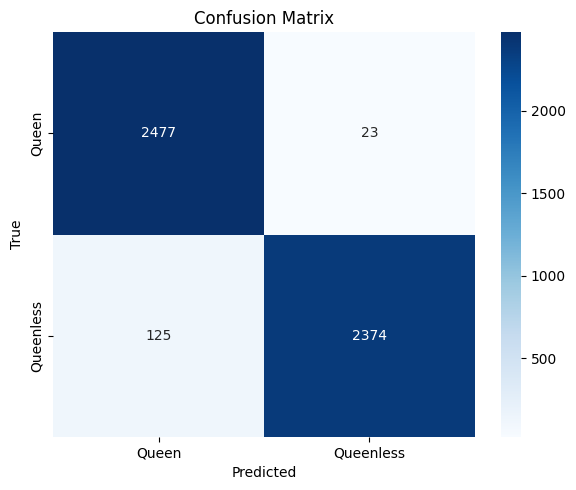

📋 Classification Report:

              precision    recall  f1-score   support

       Queen       0.95      0.99      0.97      2500
   Queenless       0.99      0.95      0.97      2499

    accuracy                           0.97      4999
   macro avg       0.97      0.97      0.97      4999
weighted avg       0.97      0.97      0.97      4999



In [ ]:
import numpy as np
np.complex = complex  # Fix for librosa compatibility

import os
import librosa
from keras.utils import to_categorical
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Configuration
SAMPLE_RATE = 22050
IMG_HEIGHT = 128
IMG_WIDTH = 128
TEST_DIR = "output_cleaned_aggressive/test"
CLASSES = ["Queen", "Queenless"]

# === Load best model
model = load_model("queen_bee_classifier.h5")

# === Extract mel spectrogram
def extract_mel(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=IMG_HEIGHT)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    if mel_db.shape[1] < IMG_WIDTH:
        mel_db = np.pad(mel_db, ((0, 0), (0, IMG_WIDTH - mel_db.shape[1])), mode='constant')
    else:
        mel_db = mel_db[:, :IMG_WIDTH]
    return mel_db

# === Load test data
X_test, y_test = [], []

for label_idx, label in enumerate(CLASSES):
    folder = os.path.join(TEST_DIR, label)
    for fname in os.listdir(folder):
        if fname.endswith(".wav"):
            fpath = os.path.join(folder, fname)
            mel = extract_mel(fpath)
            X_test.append(mel)
            y_test.append(label_idx)

X_test = np.array(X_test)[..., np.newaxis]
y_test = to_categorical(y_test)

# === Predict
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# === Confusion Matrix
labels = ["Queen", "Queenless"]
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# === Classification Report
print("📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))


1/1 [==============================] - 0s 32ms/step


C:\Users\KEN\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


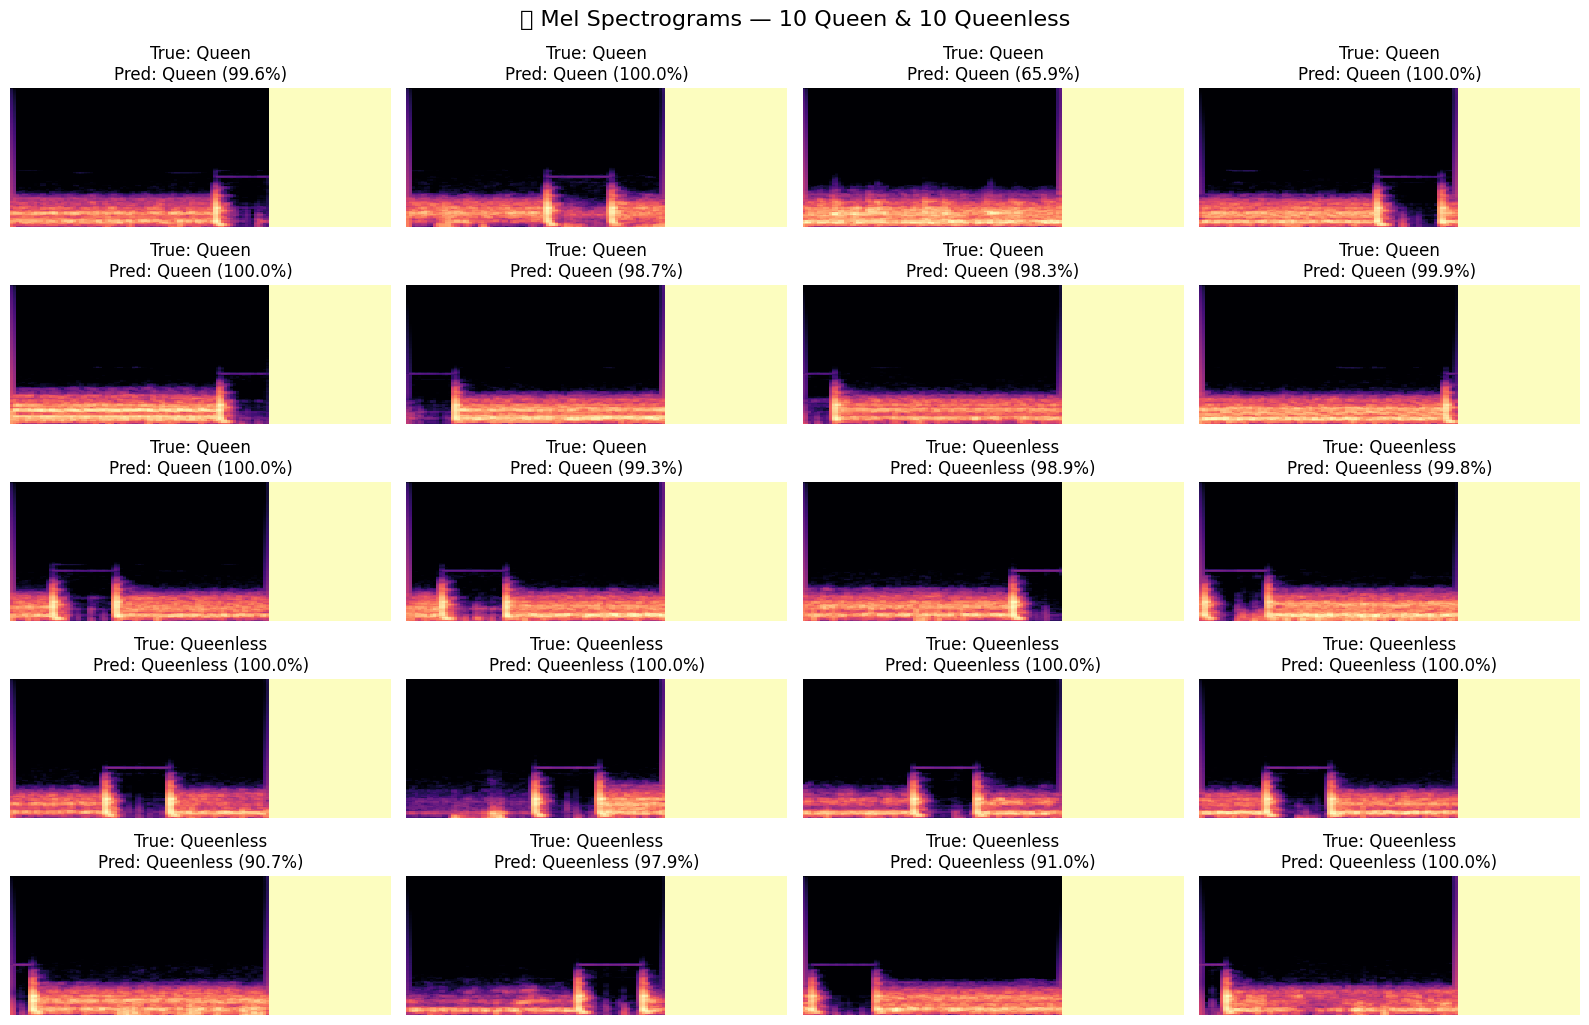

In [ ]:
import os
import random
import numpy as np
np.complex = complex  # For librosa compatibility
import librosa
import librosa.display
import matplotlib.pyplot as plt
from keras.models import load_model

# === CONFIG
MODEL_PATH = "queen_bee_classifier.h5"
TEST_DIR = "output_cleaned_aggressive/test"
CLASSES = ["Queen", "Queenless"]
SAMPLE_RATE = 22050
IMG_HEIGHT = 128
IMG_WIDTH = 128
SAMPLES_PER_CLASS = 10

# === Load model
model = load_model(MODEL_PATH)

# === Mel spectrogram extraction
def extract_mel(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=IMG_HEIGHT)
    mel_db = librosa.power_to_db(mel, ref=np.max)
    if mel_db.shape[1] < IMG_WIDTH:
        mel_db = np.pad(mel_db, ((0, 0), (0, IMG_WIDTH - mel_db.shape[1])), mode='constant')
    else:
        mel_db = mel_db[:, :IMG_WIDTH]
    return mel_db

# === Get 10 random samples from each class
samples = []
for label in CLASSES:
    folder = os.path.join(TEST_DIR, label)
    files = [f for f in os.listdir(folder) if f.endswith(".wav")]
    chosen = random.sample(files, SAMPLES_PER_CLASS)
    for fname in chosen:
        path = os.path.join(folder, fname)
        samples.append((path, label))

# === Plot setup
fig, axes = plt.subplots(5, 4, figsize=(16, 10))
axes = axes.flatten()

# === Predict and display mel spectrograms
for idx, (path, true_label) in enumerate(samples):
    mel = extract_mel(path)
    input_tensor = mel[np.newaxis, ..., np.newaxis]
    pred_probs = model.predict(input_tensor)[0]
    pred_label = CLASSES[np.argmax(pred_probs)]
    confidence = np.max(pred_probs) * 100

    ax = axes[idx]
    librosa.display.specshow(mel, sr=SAMPLE_RATE, hop_length=512, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f"True: {true_label}\nPred: {pred_label} ({confidence:.1f}%)")
    ax.axis("off")

# === Cleanup
for i in range(len(samples), len(axes)):
    axes[i].axis("off")

plt.tight_layout()
plt.suptitle("🎧 Mel Spectrograms — 10 Queen & 10 Queenless", fontsize=16, y=1.02)
plt.show()


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("queen_bee_classifier.h5", compile=False)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("queen_model.tflite", "wb") as f:
    f.write(tflite_model)

print("✅ Successfully converted on PC.")


INFO:tensorflow:Assets written to: C:\Users\KEN\AppData\Local\Temp\tmp757akr5i\assets


INFO:tensorflow:Assets written to: C:\Users\KEN\AppData\Local\Temp\tmp757akr5i\assets


✅ Successfully converted on PC.
